In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\Jalpa\Desktop\Modular-1\ML_LinearRegression\DATA\cement_slump.csv')
df.head()

,Unnamed: 0,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


<AxesSubplot:>

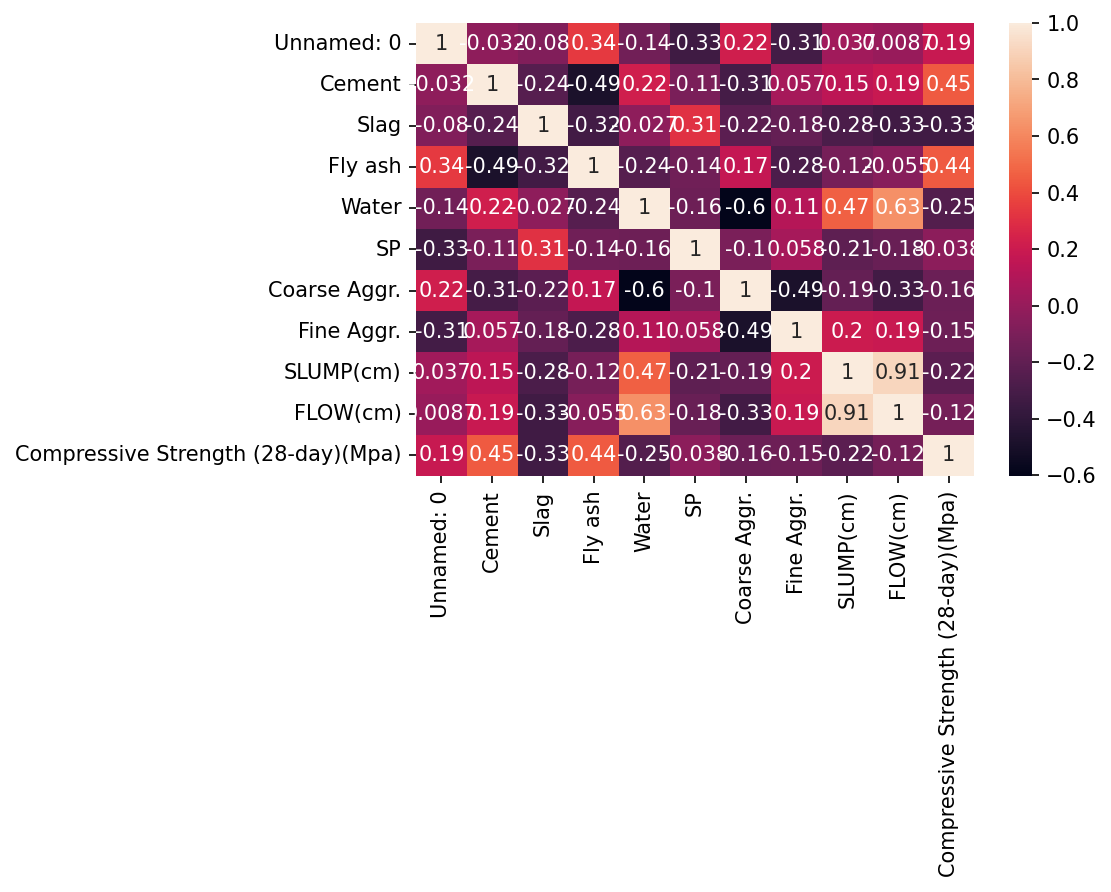

In [4]:
plt.figure(dpi = 150)
sns.heatmap(df.corr(), annot = True)

In [5]:
df.columns

Index(['Unnamed: 0', 'Cement', 'Slag', 'Fly ash', 'Water', 'SP',
       'Coarse Aggr.', 'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [6]:
X = df.drop('Compressive Strength (28-day)(Mpa)', axis =1)

In [7]:
y = df['Compressive Strength (28-day)(Mpa)']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
scaled_X_train = scaler.fit_transform(X_train)

In [13]:
scaled_X_test = scaler.transform(X_test)

In [14]:
from sklearn.svm import SVR, LinearSVR #linear kernel

In [15]:
base_model = SVR()

In [16]:
base_model.fit(scaled_X_train, y_train)

SVR()

In [17]:
base_preds = base_model.predict(scaled_X_test)
base_preds

array([33.58078042, 36.09571499, 35.41736281, 34.74740535, 38.32091091,
       37.29135101, 35.13249153, 37.22209398, 38.99666006, 40.18462213,
       36.1139343 , 33.79592293, 34.06545599, 35.44211789, 38.76779704,
       39.00173987, 38.22089913, 36.48306636, 32.69110598, 34.52873486,
       37.00427398, 36.05366416, 35.54699015, 33.21812593, 38.19804128,
       36.18409912, 34.82969611, 33.23419531, 35.98790918, 36.28168196,
       34.78339518])

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
mean_absolute_error(y_test, base_preds)

5.444660443885889

In [20]:
np.sqrt(mean_squared_error(y_test, base_preds))

6.842999526636626

In [21]:
y_test.mean()

36.26870967741935

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
param_grid = {'C': [0.001, 0.01,0.1, 0.5, 1], 'kernel': ['linear', 'rbf', 'poly'], 'gamma' : ['scale', 'auto'], 'degree': [2,3,4], 'epsilon': [0, 0.01, 0.1, 0.5, 1, 2]}

In [24]:
param_grid

{'C': [0.001, 0.01, 0.1, 0.5, 1],
 'kernel': ['linear', 'rbf', 'poly'],
 'gamma': ['scale', 'auto'],
 'degree': [2, 3, 4],
 'epsilon': [0, 0.01, 0.1, 0.5, 1, 2]}

In [25]:
svr = SVR()

In [26]:
grid_model = GridSearchCV(svr, param_grid)

In [27]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [28]:
grid_model.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [29]:
grid_preds = grid_model.predict(scaled_X_test)

In [30]:
mean_absolute_error(y_test,grid_preds)

2.5350265600771267

In [31]:
np.sqrt(mean_squared_error(y_test,grid_preds))

3.190797395219703